In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DataSets/modified_synthetic_economic_data.csv')

In [4]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [ ]:
# lets drop unnecessary columns ==> like year and month since we do not need them for predicting the target variable that is index_prize
df.drop(columns=['year', 'month'], inplace=True)

In [11]:
df.sample(10)

,interest_rate,unemployment_rate,index_price
357,2.71,3.80,438.145203
548,3.37,5.28,484.815643
297,3.31,6.81,302.989333
149,3.30,4.66,529.217501
388,3.95,3.76,826.780141
601,2.08,4.91,124.384955
364,3.69,6.11,495.533001
639,1.70,4.69,30.130381
855,2.43,3.77,354.485116
282,4.59,7.59,616.590530


In [12]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

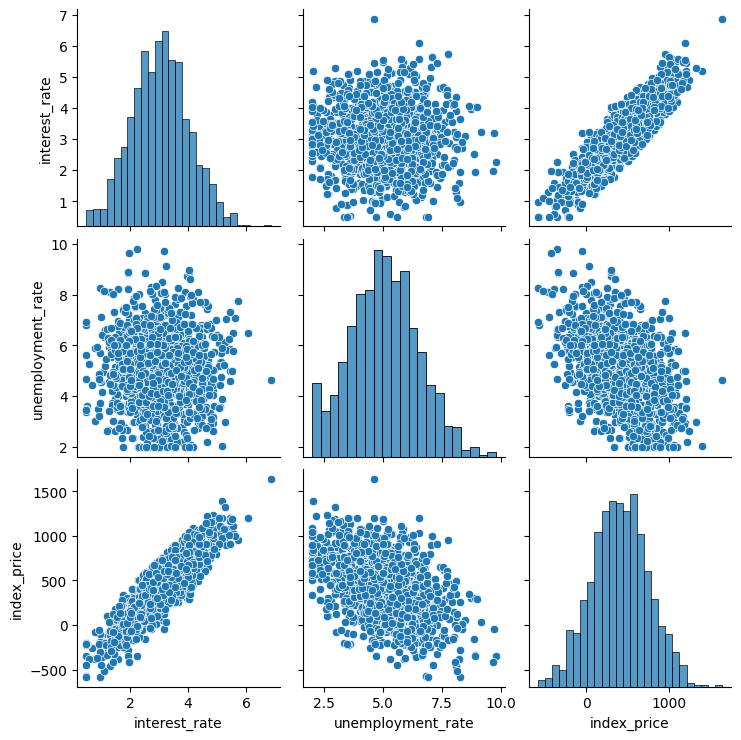

In [13]:
# Visualize the relationships between features and the target variable
sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


## Interpretation of Correlation Matrix for Feature Selection

- In Correlation Matrix above:
    - we see correlation coefficients between each pair of features
    - values range from -1 to 1
        - indicate strength and direction of linear relationships
        - 1: perfect positive correlation
        - -1: perfect negative correlation
        - 0: no linear correlation
            - \> 0.7 or < -0.7: strong correlation
            - 0.3 to 0.7 or -0.3 to -0.7: moderate correlation
            - < 0.3 or > -0.3: weak correlation
- Here we observe:
    - interest_rate vs index_price: 0.89 (strong positive correlation)
    - unemployment_rate vs index_price: -0.44 (moderate negative correlation)
    - interest_rate vs unemployment_rate: 0.014 (negligible correlation)

- and select features based on their correlation with the target variable (index_price) and multicollinearity among features.

For predicting index_price, interest_rate is the strongest predictor with a high positive correlation (0.89), while unemployment_rate shows a moderate negative relationship (-0.44). Since the input features are nearly uncorrelated 
with each other, the dataset is well-suited for linear regression without multicollinearity issues.

- Should you drop any column?

    - ❌ NO

        interest_rate → must keep

        unemployment_rate → improves model stability & realism

    - Only drop features if:

        Correlation with target ≈ 0

        OR severe multicollinearity (not here) : meaning the features are highly correlated with each other => interest_rate vs unemployment_rate → 0.014